In [1]:
import os
import configparser

PATH = os.getcwd()[:os.getcwd().rfind('\\')] # path to ProFIT directory
config = configparser.ConfigParser()
config.add_section("packageLocation")
config.set("packageLocation", "workingDir", PATH)
config.set("packageLocation", "packageDir", PATH+'\\profit')

In [2]:
import sys
sys.path.append(config["packageLocation"]["workingDir"])
sys.path.append(config["packageLocation"]["packageDir"])

In [3]:
from profit import ProcessMap

c:\Users\ashis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
monitoring = PATH + "/demo/log_examples/remote_monitoring_eng.csv"
declarations = PATH + "/demo/log_examples/DomesticDeclarations.xes"

In [5]:
import pandas as pd

# log demo
df_monitoring = pd.read_csv(monitoring, encoding='cp1251')
df_monitoring.head()

,case_id,task,timestamp
0,4082,New med. program (operator),2018-01-10 00:00:03
1,4082,Red zone (operator),2018-01-10 22:09:21
2,4173,New med. program (operator),2018-01-12 00:00:04
3,4176,New med. program (operator),2018-01-12 00:00:04
4,4082,Red zone (doctor FD),2018-01-12 02:44:28


In [6]:
pm = ProcessMap()

In [7]:
pm.set_log(FILE_PATH = monitoring, 
#            data = df_monitoring,
           encoding = 'utf-8')

pm.update()

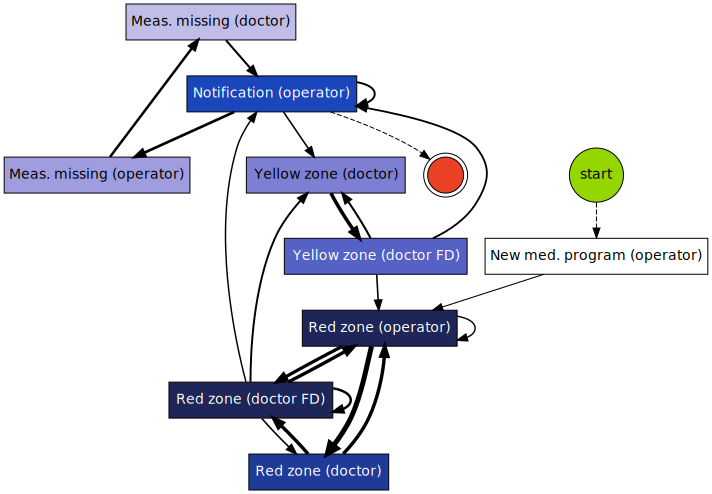

In [8]:
# without saving
pm.render()

An user can tune several parameters via `set_rates` and `set_params` methods:
- activity and path rates which regulate process model details;
- an option to discover an optimal process model based on mixed-paradigm process mining;
- a regularization factor to control the balance between model complexity and completeness;
- an option to meta-states search and cycle aggregation in the model;
- types of aggregation;
- etc. (see docstrings for `ProcessMap`)

As a default setting, the algorithm tries to find an optimal process model. So, when changing rates, one should set `optimize=False` to turn off its autotune. A general optimization problem is as follows:

$$\mathcal{Q}(p, X^l) = (1-\lambda)\cdot F + \lambda\cdot C_{\mathcal{J}} \longrightarrow \min_{\theta},$$

where $\mathcal{Q}$ is a quality function, $p$ is an algorithm for process model discovery from data, $X^l$ is a log sample, $\lambda$ is a regularization factor, $F$ is a loss function, $C_\mathcal{J}$ is a complexity function, $\theta$ is a vector of rate parameters.

In [9]:
pm2 = ProcessMap()
pm2.set_log(FILE_PATH=declarations)
pm2.update()

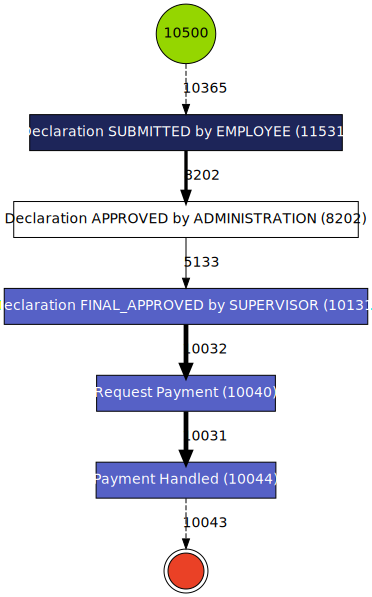

In [10]:
pm2.render()

In [11]:
pm.set_rates(activity_rate=80, path_rate=15)
pm.set_params(optimize=False, aggregate=False)

pm.update()

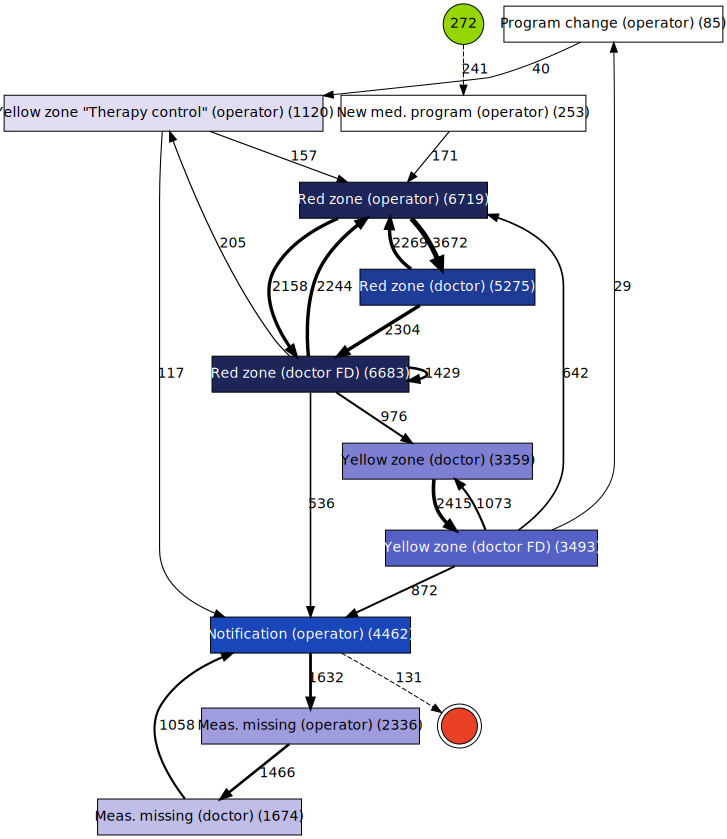

In [12]:
pm.render()

### Meta-states discovering

We define a meta-state as a significant cycle in the model, i.e., frequent cyclic behaviour in the log.

<img src="../meta/cycles_joining.png" width=600 align="center"/>

Example of process model reconstruction: (a) initial model; (b) cycle folding with outer joining; (c) cycle folding with inner joining and "to all" redirecting heuristic; (d) cycle folding with inner joining and "to frequent" redirecting heuristic

In [13]:
pm.set_rates(activity_rate=80, path_rate=5)
pm.set_params(optimize=False, 
              aggregate=True,
              heuristic='all',
              agg_type='inner')

pm.update()

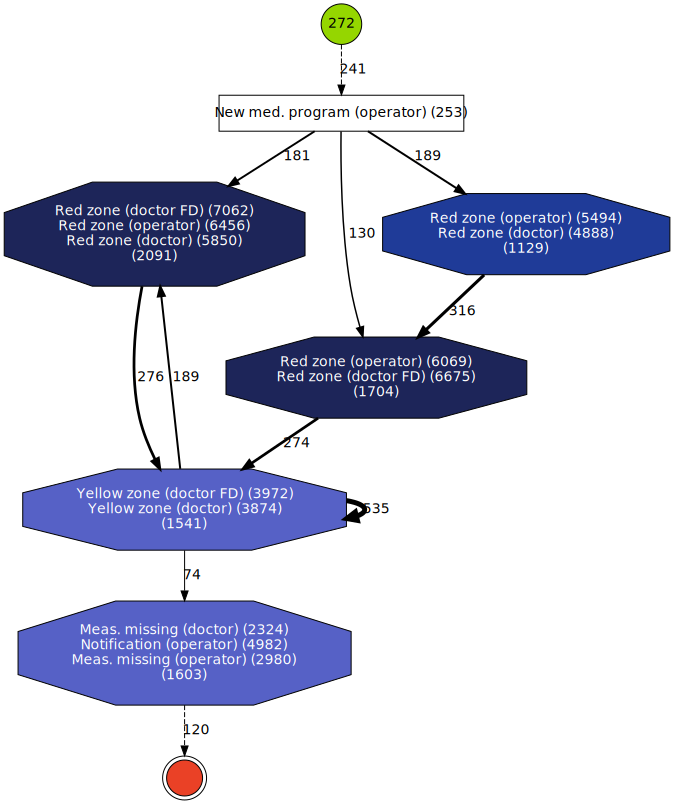

In [14]:
pm.render()